In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Variable that will be interesting to utilize
1. Employment
2. Country
3. EdLevel
4. Undergradute Major
5. DevType
6. Job Satisfaction
7. Salary
8. Languages
9. Database
10. Platform
11. Framework

In [2]:
def clean(df,year):
    col_renames = ['Employment','Country','Education',
                   'Major','DeveloperType','JobSatisfaction','Salary',
                   'LanguageWorkedWith','DatabaseWorkedWith',
                   'PlatformWorkedWith','WebFrameWorkedWith']
    df.columns = col_renames
    
    is_freelance_or_fulltime = df['Employment'].str.contains('full-time|freelance',na=False)
    df = df.loc[is_freelance_or_fulltime]
    
    if ~isinstance(df['JobSatisfaction'],str):
        jobSat_buckets = {0: 'Extremely dissatisfied',
                  1: 'Moderately dissatisfied',
                  2: 'Moderately dissatisfied',
                  3: 'Slightly dissatisfied',
                  4: 'Slightly dissatisfied',
                  5: 'Neither satisfied nor dissatisfied',
                  6: 'Slightly satisfied',
                  7: 'Slightly satisfied',
                  8: 'Moderately dissatisfied',
                  9: 'Moderately dissatisfied',
                  10: 'Extremely satisfied'}
        df['JobSatisfaction'] = df['JobSatisfaction'].map(jobSat_buckets)
    
    df['Year']=year
    
    return df

In [3]:
df_2017 = pd.read_csv('survey_results_public_2017.csv',low_memory=False)
print(df_2017.shape)
cols_2017 = ['EmploymentStatus','Country','FormalEducation','MajorUndergrad',
             'DeveloperType','JobSatisfaction','Salary',
             'HaveWorkedLanguage','HaveWorkedDatabase','HaveWorkedPlatform','HaveWorkedFramework',
            ]
df_2017 = df_2017[cols_2017]
df_2017 = clean(df_2017,2017)
print(df_2017.shape)
df_2017.info()

(51392, 154)
(41381, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41381 entries, 2 to 51391
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employment          41381 non-null  object 
 1   Country             41381 non-null  object 
 2   Education           41381 non-null  object 
 3   Major               37436 non-null  object 
 4   DeveloperType       33895 non-null  object 
 5   JobSatisfaction     38549 non-null  object 
 6   Salary              12444 non-null  float64
 7   LanguageWorkedWith  30549 non-null  object 
 8   DatabaseWorkedWith  25328 non-null  object 
 9   PlatformWorkedWith  24259 non-null  object 
 10  WebFrameWorkedWith  17396 non-null  object 
 11  Year                41381 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [4]:
df_2018 = pd.read_csv('survey_results_public_2018.csv',low_memory=False)
print(df_2018.shape)
cols_2018 = ['Employment','Country','FormalEducation','UndergradMajor',
             'DevType','JobSatisfaction','Salary',
             'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','FrameworkWorkedWith'
            ]
df_2018 = df_2018[cols_2018]
df_2018 = clean(df_2018,2018)
print(df_2018.shape)
df_2018.info()

(98855, 129)
(79777, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79777 entries, 1 to 98853
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employment          79777 non-null  object
 1   Country             79777 non-null  object
 2   Education           78464 non-null  object
 3   Major               69507 non-null  object
 4   DeveloperType       76150 non-null  object
 5   JobSatisfaction     0 non-null      object
 6   Salary              45572 non-null  object
 7   LanguageWorkedWith  65569 non-null  object
 8   DatabaseWorkedWith  57008 non-null  object
 9   PlatformWorkedWith  55820 non-null  object
 10  WebFrameWorkedWith  44622 non-null  object
 11  Year                79777 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 7.9+ MB


In [5]:
df_2019 = pd.read_csv('survey_results_public_2019.csv',low_memory=False)
print(df_2019.shape)
cols_2019 = ['Employment','Country','EdLevel','UndergradMajor',
             'DevType','JobSat','CompTotal',
             'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith'
            ]
df_2019 = df_2019[cols_2019]
df_2019 = clean(df_2019,2019)
print(df_2019.shape)
df_2019.info()

(88883, 85)
(72951, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 72951 entries, 2 to 88881
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employment          72951 non-null  object 
 1   Country             72897 non-null  object 
 2   Education           71468 non-null  object 
 3   Major               66206 non-null  object 
 4   DeveloperType       71527 non-null  object 
 5   JobSatisfaction     0 non-null      object 
 6   Salary              53742 non-null  float64
 7   LanguageWorkedWith  72261 non-null  object 
 8   DatabaseWorkedWith  64396 non-null  object 
 9   PlatformWorkedWith  67204 non-null  object 
 10  WebFrameWorkedWith  55613 non-null  object 
 11  Year                72951 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 7.2+ MB


In [6]:
df_all = pd.concat([df_2017,df_2018,df_2019],axis=0,ignore_index=True)
df_all.shape

(194109, 12)

In [7]:
df_all.head()

,Employment,Country,Education,Major,DeveloperType,JobSatisfaction,Salary,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,Year
0,Employed full-time,United Kingdom,Bachelor's degree,Computer science or software engineering,Other,Moderately dissatisfied,113750,Java; PHP; Python,MySQL,NaN,NaN,2017
1,Employed full-time,United States,Doctoral degree,A non-computer-focused engineering discipline,NaN,Slightly dissatisfied,NaN,Matlab; Python; R; SQL,MongoDB; Redis; SQL Server; MySQL; SQLite,Windows Desktop; Linux Desktop; Mac OS; Amazon...,React,2017
2,Employed full-time,Switzerland,Master's degree,Computer science or software engineering,Mobile developer; Graphics programming; Deskto...,Moderately dissatisfied,NaN,NaN,NaN,NaN,NaN,2017
3,Employed full-time,United States,Master's degree,A non-computer-focused engineering discipline,NaN,Slightly satisfied,NaN,Matlab; Python,SQLite,Windows Desktop,NaN,2017
4,Employed full-time,Poland,Master's degree,Computer science or software engineering,Web developer,Slightly satisfied,NaN,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Redis; MySQL; PostgreSQL,Amazon Web Services (AWS),React,2017


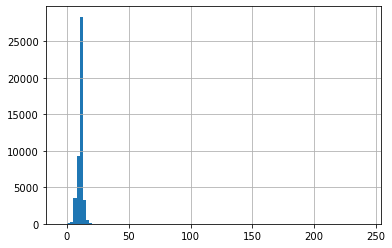

In [8]:
def log_salary(val):
    if val>0:
        return np.log(val)
    else:
        return np.nan

df_all['Salary'] = df_all['Salary'].str.replace(',','')
df_all['Salary'] = df_all['Salary'].astype(float)
df_all['logSalary'] = df_all['Salary'].apply(log_salary)
df_all['logSalary'].hist(bins=100);

In [9]:
df_all['Employment'].value_counts()

Employed full-time                                      171083
Independent contractor, freelancer, or self-employed     23026
Name: Employment, dtype: int64

In [10]:
df_all.to_csv('survey_data_17_to_19.csv',index=False)